In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('PSU_data.csv')
df.head()

,Brand,Model,Form Factor,Cybenetics Rating,20W Efficiency,40W Efficiency,60W Efficiency,80W Efficiency,Report Link
0,Seasonic,Prime Titanium 750W,ATX12V,TITANIUM,"81,93%","88,77%","90,73%","92,36%",https://www.cybenetics.com/d/cybenetics_xGy.pdf
1,Seasonic,Prime Titanium 650W,ATX12V,PLATINUM,"81,60%","88,76%","90,47%","92,08%",https://www.cybenetics.com/d/cybenetics_ZfJ.pdf
2,Corsair,RM550x (2021),ATX12V,GOLD,"81,19%","85,65%","87,39%","87,92%",https://www.cybenetics.com/d/cybenetics_rn4.pdf
3,Cooler Master,MWE 400,ATX12V,NaN,"81,12%","85,18%","86,50%","87,33%",https://www.cybenetics.com/d/cybenetics_H7o.pdf
4,Seasonic,Prime Titanium 850W,ATX12V,TITANIUM,"81,00%","88,59%","90,72%","92,14%",https://www.cybenetics.com/d/cybenetics_B7p.pdf


In [3]:
df['Model'].head()

0    Prime Titanium 750W
1    Prime Titanium 650W
2          RM550x (2021)
3                MWE 400
4    Prime Titanium 850W
Name: Model, dtype: object

Extracting the watts from the Modesl

In [4]:
df['Watts'] = df['Model'].str.findall(r'(\d+)')
df['Watts'] = df['Watts'].apply(lambda x: x[0] if x else None).str.strip('[]')
df['Watts'] = pd.to_numeric(df['Watts'], errors='coerce')

In [5]:
df.head()

,Brand,Model,Form Factor,Cybenetics Rating,20W Efficiency,40W Efficiency,60W Efficiency,80W Efficiency,Report Link,Watts
0,Seasonic,Prime Titanium 750W,ATX12V,TITANIUM,"81,93%","88,77%","90,73%","92,36%",https://www.cybenetics.com/d/cybenetics_xGy.pdf,750
1,Seasonic,Prime Titanium 650W,ATX12V,PLATINUM,"81,60%","88,76%","90,47%","92,08%",https://www.cybenetics.com/d/cybenetics_ZfJ.pdf,650
2,Corsair,RM550x (2021),ATX12V,GOLD,"81,19%","85,65%","87,39%","87,92%",https://www.cybenetics.com/d/cybenetics_rn4.pdf,550
3,Cooler Master,MWE 400,ATX12V,NaN,"81,12%","85,18%","86,50%","87,33%",https://www.cybenetics.com/d/cybenetics_H7o.pdf,400
4,Seasonic,Prime Titanium 850W,ATX12V,TITANIUM,"81,00%","88,59%","90,72%","92,14%",https://www.cybenetics.com/d/cybenetics_B7p.pdf,850


In [6]:
nan_values = df['Watts'].isna()
print("\nNaN values in the 'Watts' column:")
print(nan_values)


NaN values in the 'Watts' column:
0      False
1      False
2      False
3      False
4      False
       ...  
587    False
588    False
589    False
590    False
591    False
Name: Watts, Length: 592, dtype: bool


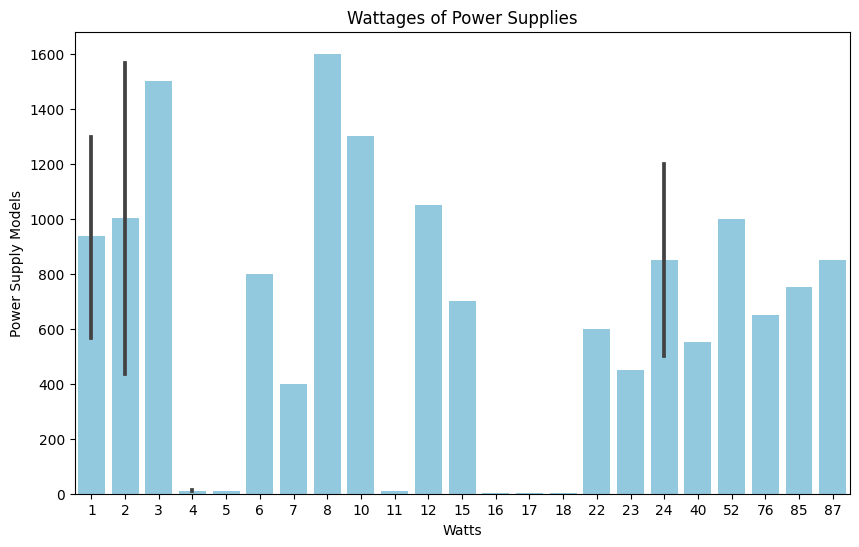

In [16]:
aggregated_df = df.groupby('Watts').size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Watts', data=aggregated_df, color='skyblue')
plt.xlabel('Watts')
plt.ylabel('Power Supply Models')
plt.title('Wattages of Power Supplies')
plt.show()